In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#read data
c = pd.read_csv('Characters.csv', encoding = 'unicode_escape')
d = pd.read_csv('Dialogue.csv', encoding = 'unicode_escape')

<AxesSubplot:ylabel='count'>

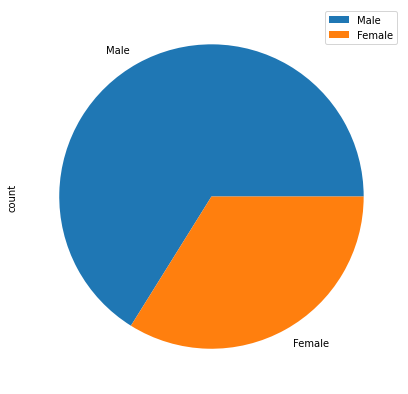

In [28]:
# genre of characters

g = c['Gender'].value_counts().to_frame('count').rename_axis('Gender').reset_index()
g = g.loc[:1] #clearing wrong data
g.plot.pie(y = 'count', figsize = (7,7), labels = g['Gender'])

[Text(0.5, 1.0, 'Count of species'), Text(0.5, 0, 'Total characters')]

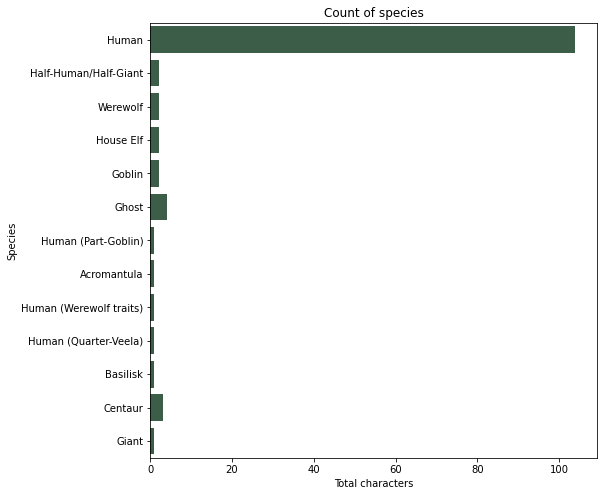

In [29]:
#What is the most common species in movies? 

plt.figure(figsize=(8,8))
sns.countplot(data=c, y='Species', color = '#366447').set(title='Count of species', xlabel = 'Total characters')

[Text(0.5, 1.0, 'Distribution of Houses'), Text(0.5, 0, 'Student count')]

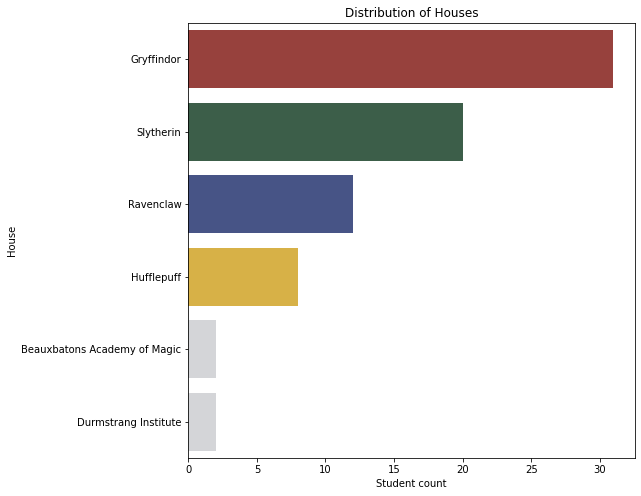

In [30]:
#How is the division between the houses?

plt.figure(figsize=(8,8))
sns.countplot(data=c, y='House', palette=['#A6332E', '#366447','#3C4E91','#EFBC2F','#D3D4D9',
                                          '#D3D4D9']).set(title='Distribution of Houses', xlabel = 'Student count')

In [31]:
#merge Character and Dialogue tables

cd = pd.merge(c, d, on =['Character ID'])
cd = cd[['Character ID','Character Name', 'Dialogue']]

In [32]:
# how many times has someone said "Voldemort"

v = cd[['Character Name','Dialogue']][cd['Dialogue'].str.contains('Voldemort')]
print (f'He who must not be named was named {v["Dialogue"].count()} times during the movies 💀')

He who must not be named was named 92 times during the movies 💀


[Text(0.5, 1.0, 'Who dares speak your name with your unworthy lips?'),
 Text(0.5, 0, 'times they spoke')]

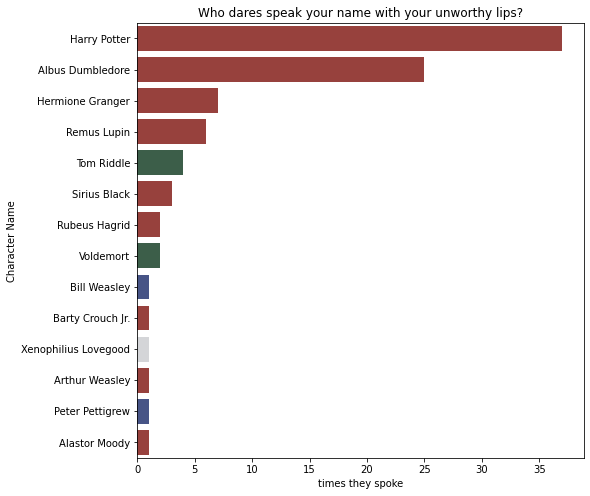

In [33]:
# Who said your name the most? 

plt.figure(figsize=(8,8))
sns.countplot(data=v, y='Character Name',
              palette=['#A6332E', '#A6332E','#A6332E','#A6332E','#366447',
                       '#A6332E','#A6332E','#366447','#3C4E91','#A6332E',
                       '#D3D4D9','#A6332E','#3C4E91','#A6332E'], 
              order = v['Character Name'].value_counts().index).set(title='Who dares speak your name with your unworthy lips?',
                                                                             xlabel = 'times they spoke')

In [34]:
# Top 3 count who said his name

v.groupby('Character Name')['Dialogue'].count().sort_values(ascending=False).head()

Character Name
Harry Potter        37
Albus Dumbledore    25
Hermione Granger     7
Remus Lupin          6
Tom Riddle           4
Name: Dialogue, dtype: int64

<AxesSubplot:title={'center':'Who said "Harry" the most times?'}, ylabel='Character'>

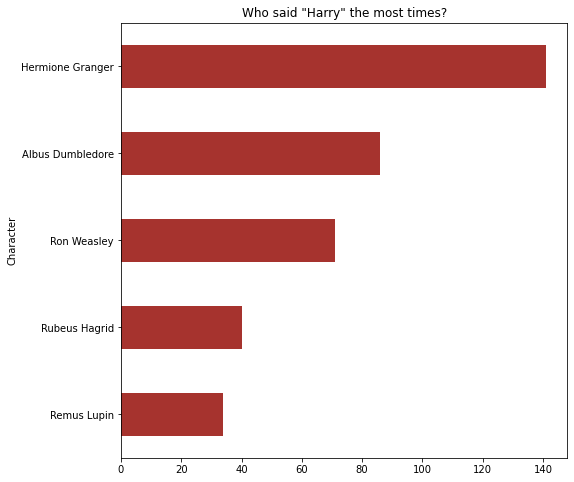

In [35]:
# Who said "Harry" the most times?
h = cd[['Character Name','Dialogue']][cd['Dialogue'].str.contains('Harry')]
h = h.groupby('Character Name')['Dialogue'].count().sort_values(ascending=True).tail()

h.plot.barh(xlabel='Character',figsize=(8, 8), color = '#A6332E', title = 'Who said "Harry" the most times?')

[Text(0.5, 1.0, 'What is the most common core in wands?'),
 Text(0.5, 0, 'Quantity')]

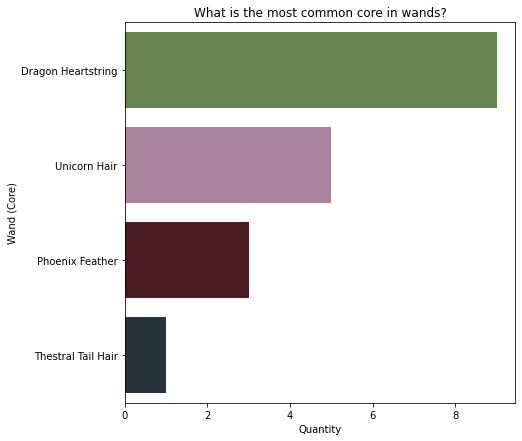

In [36]:
#What is the most common core in wands?

plt.figure(figsize=(7,7))
sns.countplot(data=c, y='Wand (Core)',
              palette=['#628B48', '#AE7C9F','#53131E','#22333B'], 
              order = c['Wand (Core)'].value_counts().index).set(title='What is the most common core in wands?',
                                                                             xlabel = 'Quantity')